<a href="https://colab.research.google.com/github/AhmedEhab2022/student-score-prediction/blob/main/Student_Score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

# Google Colab integration
from google.colab import drive

# Import Student Performance Factors Dataset

In [ ]:
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Student Score Predication/StudentPerformanceFactors.csv"
df = pd.read_csv(path)

# Get first five rows in data frame
df.head()

Mounted at /content/drive


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# Basic Info

In [ ]:
print(f"data frame shape: {df.shape}")
print("=" * 70)

print("data frame info:")
print(df.info())
print('=' * 70)

print(f"data frame describe:\n{df.describe()}")

data frame shape: (6607, 20)
data frame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Pe

The maximum exam score is 101, which is valid according to the dataset description

# Cleaning Dataset

## Check for duplicates and remove them

In [ ]:
df.duplicated().sum()

np.int64(0)

No duplicates to remove

## Check for missing values and fix/remove them

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Impute Teacher_Quality using School_Type and Family_Income
df['Teacher_Quality'] = df.groupby(['School_Type', 'Family_Income'])['Teacher_Quality'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Medium')
)

# Impute Parental_Education_Level using Parental_Involvement
df['Parental_Education_Level'] = df.groupby('Parental_Involvement')['Parental_Education_Level'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'College')
)

# Impute Distance_from_Home using School_Type
df["Distance_from_Home"] = df.groupby("School_Type")["Distance_from_Home"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Near")
)

df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


## Remove irrelevant columns

In [ ]:
# As the linear model based on hours_studied and Exam_Score columns, so drop other columns
df_linear = df[['Hours_Studied', 'Exam_Score']]

df_linear.head()

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70


# Exploring distributions and correlations

## Box Plot

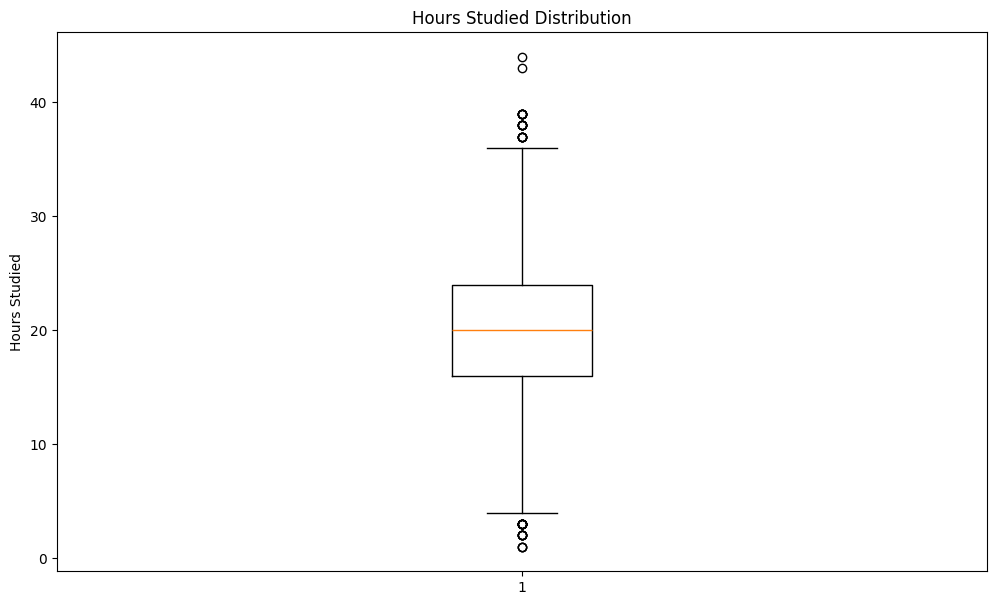

In [ ]:
fig = plt.figure(figsize=(12, 7))
plt.boxplot(x=df['Hours_Studied'])
plt.title('Hours Studied Distribution')
plt.ylabel('Hours Studied')
plt.show()

In [ ]:
px.box(data_frame=df_linear, x='Hours_Studied', title='Hours Studied Distribution')

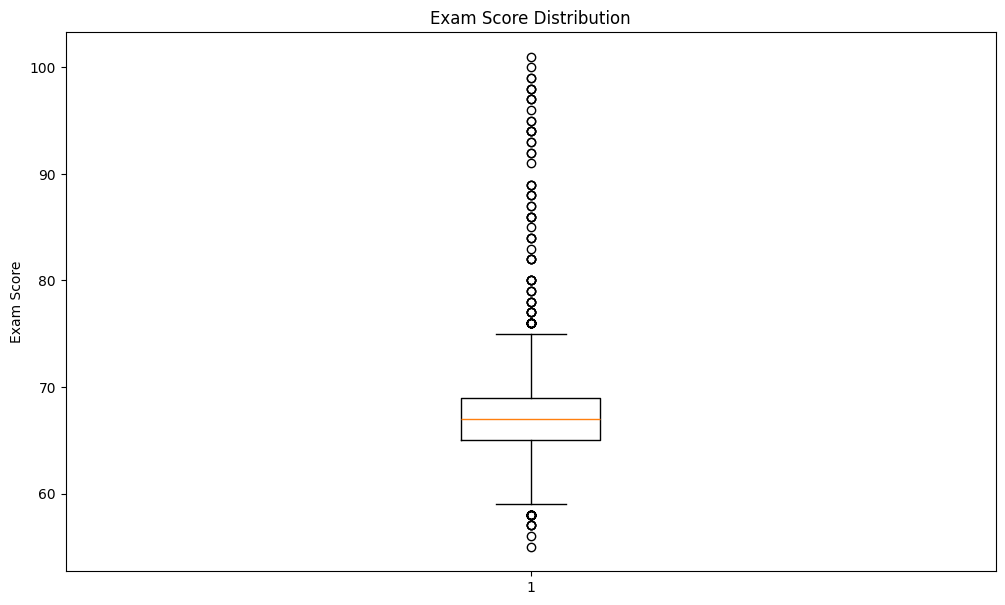

In [ ]:
fig = plt.figure(figsize=(12, 7))
plt.boxplot(x=df_linear['Exam_Score'])
plt.title('Exam Score Distribution')
plt.ylabel('Exam Score')
plt.show()

In [ ]:
px.box(data_frame=df_linear, x='Exam_Score', title='Exam Score Distribution')

## Histogram

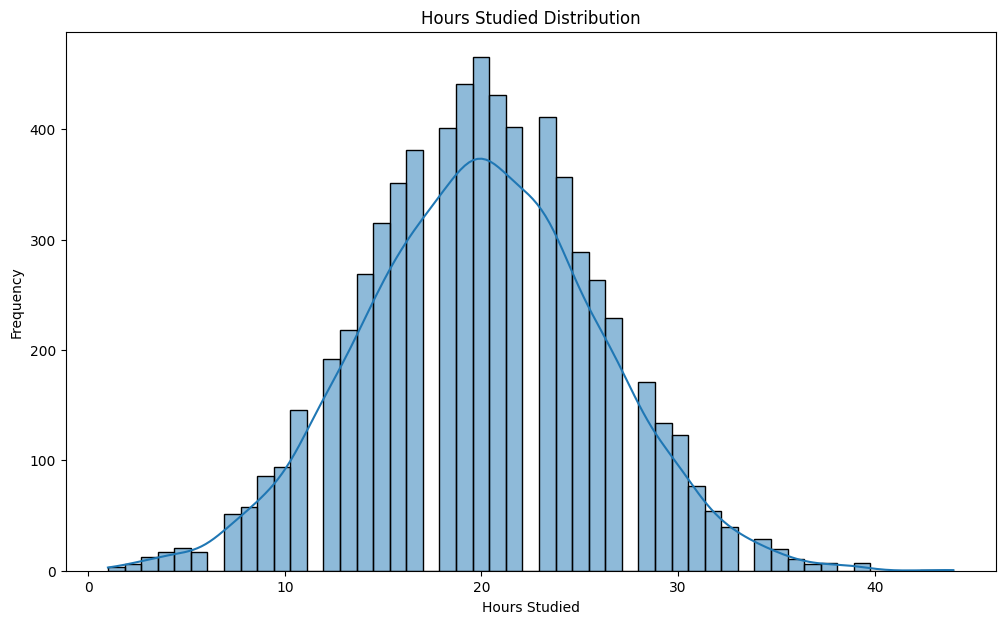

In [ ]:
fig = plt.figure(figsize=(12, 7))
sns.histplot(data=df_linear, x='Hours_Studied', kde=True)
plt.title('Hours Studied Distribution')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

In [ ]:
px.histogram(df_linear, x='Hours_Studied', title='Exam Score Distribution', nbins=100)

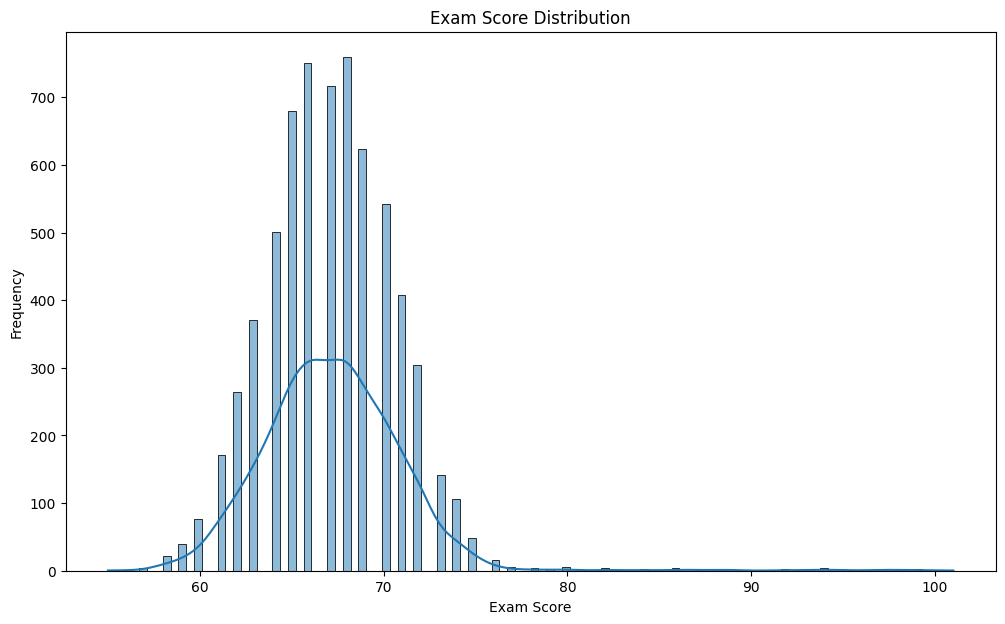

In [ ]:
fig = plt.figure(figsize=(12, 7))
sns.histplot(data=df_linear, x='Exam_Score', kde=True)
plt.title('Exam Score Distribution')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
px.histogram(df_linear, x='Exam_Score', title='Exam Score Distribution', nbins=100)

## Scatter Plot

Text(0.5, 1.0, 'Hours Studied vs Exam Score')

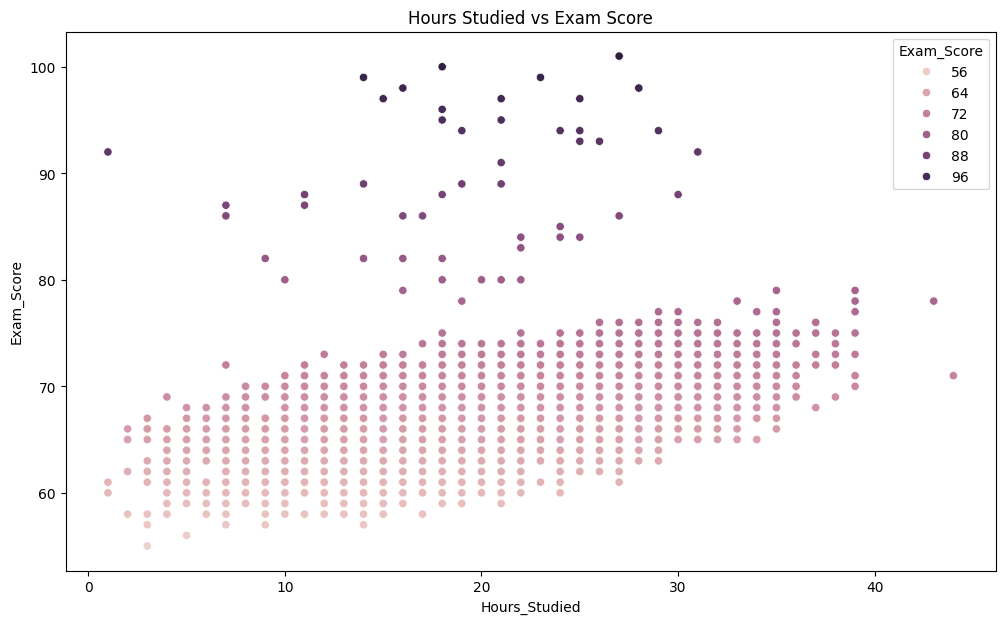

In [ ]:
fig = plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_linear, x='Hours_Studied', y='Exam_Score', hue='Exam_Score')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours Studied vs Exam Score')

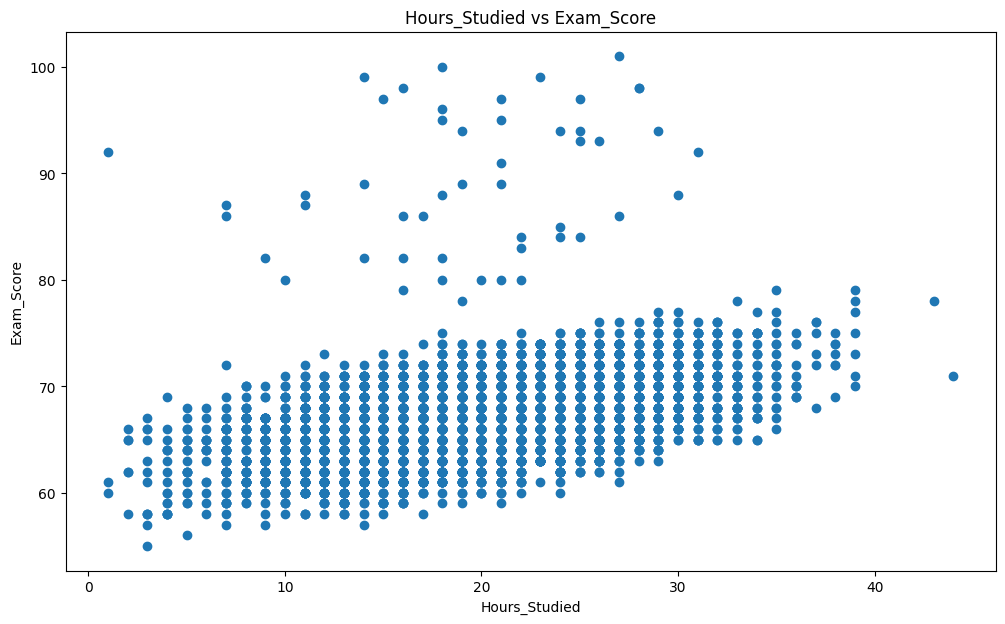

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(df_linear['Hours_Studied'], df_linear['Exam_Score'])
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.show()

In [ ]:
px.scatter(df_linear, x='Hours_Studied', y='Exam_Score')

## Correlation Matrix

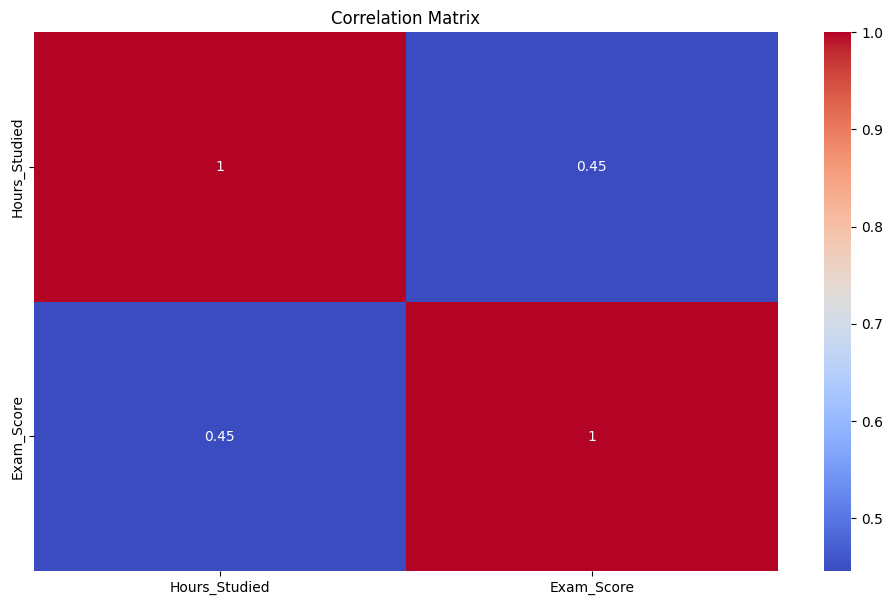

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_linear.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
px.imshow(df_linear.corr(), title='Correlation Matrix', color_continuous_scale='RdBu', text_auto=True)

## Pair Plot

<Figure size 1200x700 with 0 Axes>

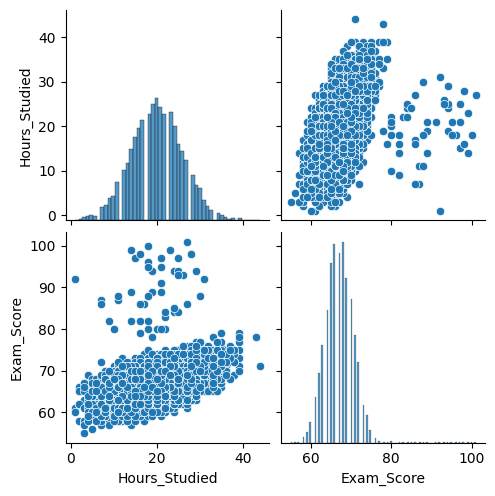

In [ ]:
fig = plt.figure(figsize=(12, 7))
sns.pairplot(df_linear)
plt.show()

# Model Training

## Spliting the dataset

In [ ]:
# Split the data
X = df_linear[['Hours_Studied']] # double square brackets to make it a data frame not pandas series
y = df_linear['Exam_Score']

# Split data to 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear regression

In [ ]:
def train_linear_model(X_train, y_train):
    # Create and train the model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    return linear_model


linear_model = train_linear_model(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

## Polynomial regression

In [ ]:
def train_polynomial_model(X_train, y_train, degree=2):
  # Transform the features to be polynomial
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  # Create and train the model
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  return poly_model, X_test_poly


poly_model, X_test_poly = train_polynomial_model(X_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_test_poly)

# Model Evaluating and Visualizing

## Linear regression

In [ ]:
def evaluate_linear_model(y_test, y_pred):
  print(f"Coefficient: {linear_model.coef_[0]:.2f}")
  print(f"Intercept: {linear_model.intercept_:.2f}")

  print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear):.2f}")
  print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred_linear):.2f}")
  print(f"R-Squared Score: {r2_score(y_test, y_pred_linear):.2f}")

evaluate_linear_model(y_test, y_pred_linear)

Coefficient: 0.29
Intercept: 61.51
Mean Squared Error: 10.86
Root Mean Squared Error: 3.29
R-Squared Score: 0.23


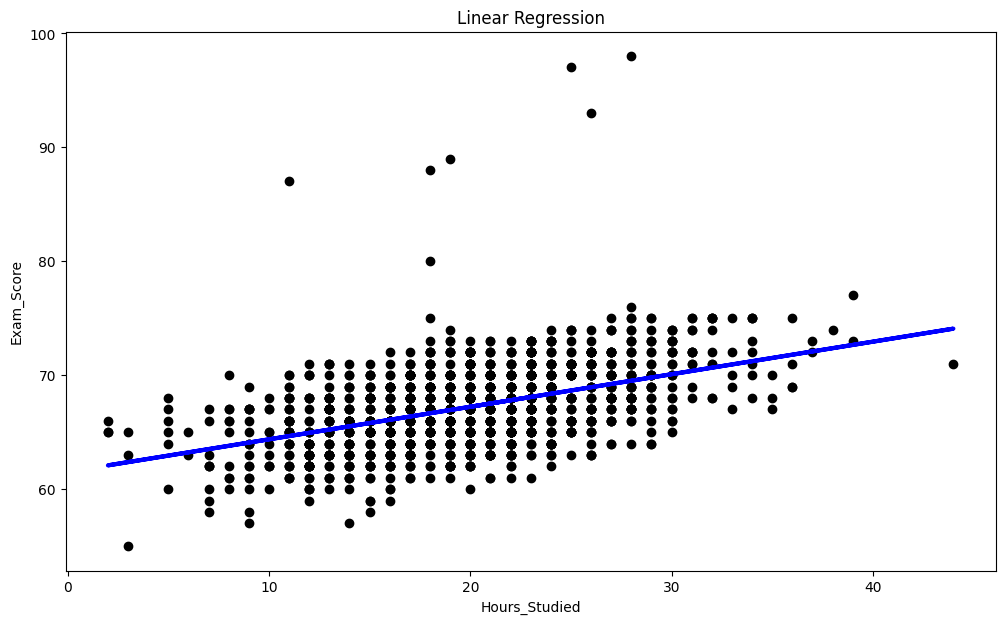

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred_linear, color='blue', linewidth=3)
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Linear Regression')
plt.show()

In [ ]:
# sqeeze(): removes extra dimensions from X_test (n, 1) -> (n,)
fig = px.scatter(x=X_test.squeeze(), y=y_test, title='Linear Regression', labels={'x': 'Hours_Studied', 'y': 'Exam_Score'})
fig.add_scatter(x=X_test.squeeze(), y=y_pred_linear, mode='lines', name='Linear Regression line')
fig.show()

## Polynomial regression

In [ ]:
def evaluate_polynomial_model(y_test, y_pred):
  print(f"Coefficients: {np.round(poly_model.coef_, 2)}")
  print(f"Intercept: {poly_model.intercept_:.2f}")

  print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_poly):.2f}")
  print(f"Root Mean Squared Error: {root_mean_squared_error(y_test, y_pred_poly):.2f}")
  print(f"R-Squared Score: {r2_score(y_test, y_pred_poly):.2f}")

evaluate_polynomial_model(y_test, y_pred_poly)

Coefficients: [0.23 0.  ]
Intercept: 61.99
Mean Squared Error: 10.84
Root Mean Squared Error: 3.29
R-Squared Score: 0.23


In [ ]:
# Make the X_test and y_pred_poly sorted to make the regression line smooth in plot

# Get the indices that would sort X_test in ascending order
sort_idx = np.argsort(X_test.squeeze())

# Sort X_test values using the sorting indices
X_test_sorted = X_test.squeeze().iloc[sort_idx]

# Reorder the predicted values to match the sorted X_test
y_pred_poly_sorted = y_pred_poly[sort_idx]

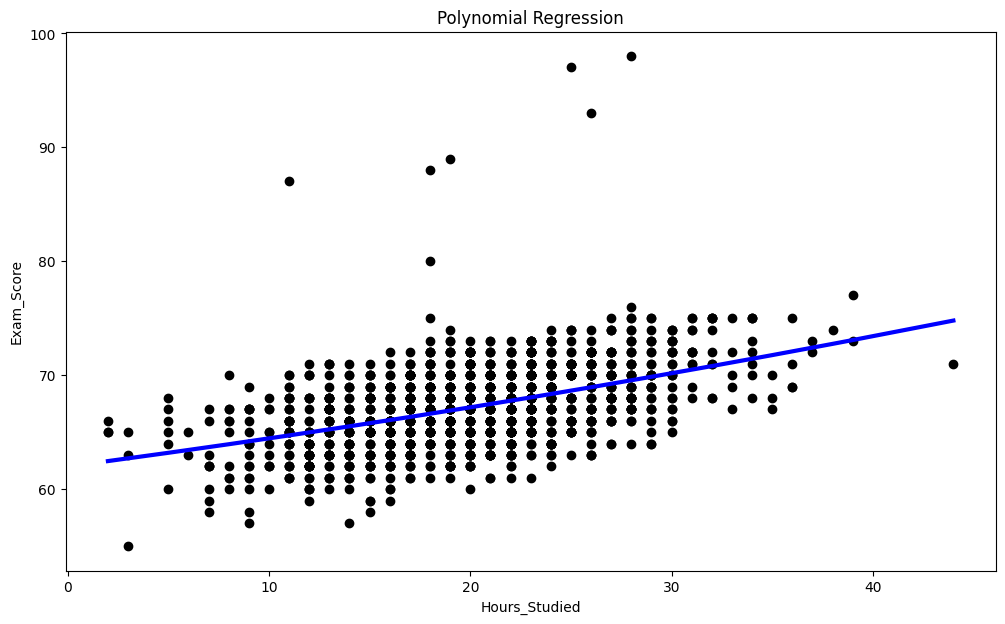

In [ ]:
plt.figure(figsize=(12, 7))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='blue', linewidth=3)
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
fig = px.scatter(x=X_test.squeeze(), y=y_test, title='Polynomial Regression', labels={'x': 'Hours_Studied', 'y': 'Exam_Score'})
fig.add_scatter(x=X_test_sorted, y=y_pred_poly_sorted, mode='lines', name='Polynomial Regression line')
fig.show()

# Linear regression vs Polynomial regression

In this dataset (Hours_Studied, Exam_Score), the relationship is approximately linear. As a result, polynomial regression does not provide a significant performance improvement over linear regression.

# Adding more Features

## Encode Categorical columns

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df['Teacher_Quality'] = df['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Parental_Involvement'] = df['Parental_Involvement'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Family_Income'] = df['Family_Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Motivation_Level'] = df['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Access_to_Resources'] = df['Access_to_Resources'].map({'Low': 0, 'Medium': 1, 'High': 2})


df['School_Type'] = df['School_Type'].map({"Public": 0, "Private": 1})

df['Parental_Education_Level'] = df['Parental_Education_Level'].map({"High School": 0, "College": 1, "Postgraduate": 2})

df['Internet_Access'] = df['Internet_Access'].map({'No': 0, 'Yes': 1})
df['Learning_Disabilities'] = df['Learning_Disabilities'].map({'No': 0, 'Yes': 1})

df['Peer_Influence'] = df['Peer_Influence'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,No,7,73,0,1,0,0,1,0,2,3,0,0,Near,Male,67
1,19,64,0,1,No,8,59,0,1,2,1,1,0,0,4,0,1,Moderate,Female,61
2,24,98,1,1,Yes,7,91,1,1,2,1,1,0,1,4,0,2,Near,Male,74
3,29,89,0,1,Yes,8,98,1,1,1,1,1,0,0,4,0,0,Moderate,Male,71
4,19,92,1,1,Yes,6,65,1,1,3,1,2,0,1,4,0,1,Near,Female,70


## Traning models

In [ ]:
X = df[[
    'Hours_Studied', "Sleep_Hours", "Attendance",
    "Teacher_Quality", "School_Type", "Tutoring_Sessions",
    "Previous_Scores", "Access_to_Resources", "Internet_Access",
    "Peer_Influence", "Parental_Involvement", "Family_Income",
    "Parental_Education_Level", "Motivation_Level", "Learning_Disabilities"
]]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = train_linear_model(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
poly_model, X_test_poly = train_polynomial_model(X_train, y_train, 3) # change degree from 2 to 3
y_pred_poly = poly_model.predict(X_test_poly)

## Evaluation and Visualizing

In [ ]:
evaluate_linear_model(y_test, y_pred_linear)

Coefficient: 0.29
Intercept: 35.62
Mean Squared Error: 3.42
Root Mean Squared Error: 1.85
R-Squared Score: 0.76


In [ ]:
evaluate_polynomial_model(y_test, y_pred_poly)

Coefficients: [ 1.13  2.84  1.12 -5.76  3.58 -1.34  0.1  -5.96 -6.21  2.23 -0.58  0.01
  0.06 -0.01 -0.06 -0.16  0.02 -0.01 -0.03 -0.01  0.02 -0.01 -0.17 -0.04
  0.12 -0.23  0.   -0.01 -0.15 -0.66  0.25  0.4  -0.01  0.12 -0.09 -0.01
 -0.    0.14  0.22 -0.01 -0.02 -3.4  -0.13 -0.42 -0.    0.48  4.35  0.22
 -1.58  3.58 -0.23  0.06  0.38 -2.13 -1.01  1.21  0.04  0.    0.47  2.36
 -0.42 -0.11  0.    0.06 -0.01 -0.08  0.12 -3.54  0.87  0.84 -0.33 -6.21
  0.97 -2.03  1.18 -0.48 -0.38 -0.   -0.    0.   -0.    0.    0.   -0.
  0.   -0.   -0.    0.   -0.    0.   -0.02  0.01  0.   -0.    0.   -0.01
 -0.01 -0.01  0.    0.    0.   -0.    0.   -0.   -0.    0.    0.    0.02
  0.01  0.01  0.    0.01 -0.02  0.    0.01 -0.16 -0.01  0.   -0.02  0.03
  0.03 -0.03 -0.   -0.   -0.01 -0.03  0.01 -0.    0.    0.    0.    0.
 -0.   -0.01 -0.01 -0.    0.   -0.01 -0.01  0.06 -0.01 -0.   -0.   -0.
  0.   -0.   -0.01 -0.01  0.    0.04  0.05  0.01  0.04  0.    0.   -0.
 -0.   -0.   -0.    0.   -0.   -0.01  0.09  0

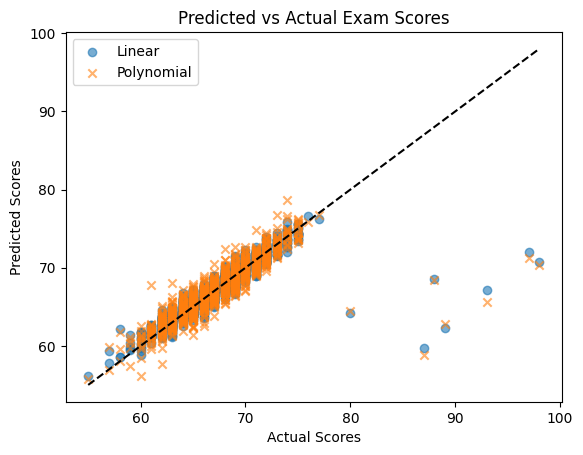

In [ ]:
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Linear")
plt.scatter(y_test, y_pred_poly, alpha=0.6, label="Polynomial", marker="x")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.legend()
plt.title("Predicted vs Actual Exam Scores")
plt.show()

# Remove Features

## Training models

In [ ]:
X = df[[
    'Hours_Studied', "Sleep_Hours", "Attendance",
    "Teacher_Quality", "School_Type", "Tutoring_Sessions",
    "Previous_Scores", "Access_to_Resources", "Internet_Access",
    "Peer_Influence", "Parental_Involvement"
]]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = train_linear_model(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [ ]:
poly_model, X_test_poly = train_polynomial_model(X_train, y_train, 4) # Change degree from 2 to 4
y_pred_poly = poly_model.predict(X_test_poly)

## Evaluation and Visualizing

In [ ]:
evaluate_linear_model(y_test, y_pred_linear)

Coefficient: 0.29
Intercept: 36.77
Mean Squared Error: 3.92
Root Mean Squared Error: 1.98
R-Squared Score: 0.72


In [ ]:
evaluate_polynomial_model(y_test, y_pred_poly)

Coefficients: [  9.71  53.57  22.07 ...   0.09   0.87 -12.65]
Intercept: -874.55
Mean Squared Error: 6.62
Root Mean Squared Error: 2.57
R-Squared Score: 0.53


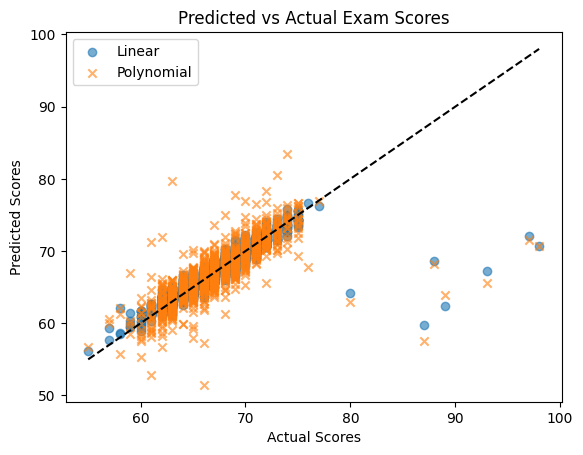

In [ ]:
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Linear")
plt.scatter(y_test, y_pred_poly, alpha=0.6, label="Polynomial", marker="x")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.legend()
plt.title("Predicted vs Actual Exam Scores")
plt.show()

# Linear regression vs Polynomial regression

Since the dataset shows an approximately linear relationship, linear regression performs well, and polynomial regression does not provide a significant improvement. However, introducing additional relevant features improves performance, while irrelevant features can reduce it.